In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [136]:
prod_data = pd.read_csv(r'D:\python\1_Internship\bnk-scoring-log.csv', sep = ';')
train_data = pd.read_csv(r'D:\python\1_Internship\bnk-train-09.05.23.csv')

In [137]:
prod_data.describe()

,id,amount,monthly_income,food_inflation,nonfood_inflation,services_inflation,int_rate,dependents,additional_income,work_exp,threshold,prediction
count,2062.000000,2.062000e+03,2.062000e+03,2.062000e+03,2.062000e+03,2.062000e+03,2062.000000,2062.000000,2.062000e+03,2062.000000,2062.000000,2062.000000
mean,1031.500000,8.628074e+06,3.107446e+06,1.009000e+02,1.013000e+02,1.004000e+02,38.813531,1.940349,1.337460e+06,190.399127,0.205480,95.198036
std,595.392448,6.923070e+06,3.487372e+06,1.421430e-14,4.264291e-14,1.421430e-14,6.824871,1.628778,4.857816e+06,341.774655,0.068278,5.280971
min,1.000000,2.000000e+05,0.000000e+00,1.009000e+02,1.013000e+02,1.004000e+02,22.000000,0.000000,0.000000e+00,0.000000,0.100000,44.670000
25%,516.250000,4.000000e+06,1.500000e+06,1.009000e+02,1.013000e+02,1.004000e+02,37.000000,0.000000,0.000000e+00,50.000000,0.200000,94.050000
50%,1031.500000,7.000000e+06,2.000000e+06,1.009000e+02,1.013000e+02,1.004000e+02,37.000000,2.000000,0.000000e+00,83.000000,0.200000,96.650000
75%,1546.750000,1.000000e+07,4.000000e+06,1.009000e+02,1.013000e+02,1.004000e+02,41.000000,3.000000,1.500000e+06,166.000000,0.200000,98.180000
max,2062.000000,5.800000e+07,5.000000e+07,1.009000e+02,1.013000e+02,1.004000e+02,100.000000,27.000000,1.200000e+08,5631.000000,1.000000,99.820000


In [138]:
prod_data.shape

(2062, 31)

In [139]:
train_data.shape

(4660, 12)

In [140]:
prod_data.columns

Index(['created_at', 'updated_at', 'id', 'iin', 'amount', 'sector', 'branch',
       'gender', 'marital_status', 'monthly_income', 'food_inflation',
       'nonfood_inflation', 'services_inflation', 'phone_number', 'int_rate',
       'is_married', 'dependents', 'education', 'has_car', 'has_house',
       'guarantor', 'additional_income', 'work_exp', 'collateral',
       'work_place', 'new_client', 'loan_purpose', 'threshold', 'prediction',
       'is_approved', 'lime_url'],
      dtype='object')

In [141]:
train_data.columns

Index(['amount', 'duration', 'product_type', 'branch', 'gender', 'age',
       'is_married', 'income', 'food_inflation', 'nonfood_inflation',
       'services_infaltion', 'is_bad_30'],
      dtype='object')

In [142]:
prod_vars = set(prod_data.columns)
train_vars = set(train_data.columns)

common_vars = prod_vars.intersection(train_vars)
print("Общие переменные:")
common_vars

Общие переменные:


{'amount',
 'branch',
 'food_inflation',
 'gender',
 'is_married',
 'nonfood_inflation'}

In [147]:
column_train = train_data['gender'].dropna()
column_prod = prod_data['gender'].dropna()

ks_statistic, p_value = stats.ks_2samp(column_train, column_prod)

print(f"KS Statistic: {ks_statistic:.2f}")
print(f"P-Value: {p_value:.2f}")

KS Statistic: 0.11
P-Value: 0.00


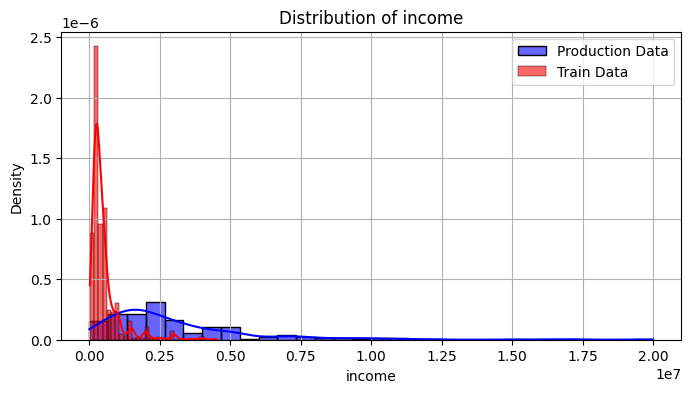


Descriptive statistics for income in cleaned production data:
  count: 2057.00
  mean: 3008534.02
  std: 2816972.38
  min: 0.00
  25%: 1500000.00
  50%: 2000000.00
  75%: 4000000.00
  max: 20000000.00

Descriptive statistics for income in cleaned train data:
  count: 4624.00
  mean: 517447.06
  std: 563729.38
  min: 16700.00
  25%: 200000.00
  50%: 340000.00
  75%: 500000.00
  max: 4500000.00


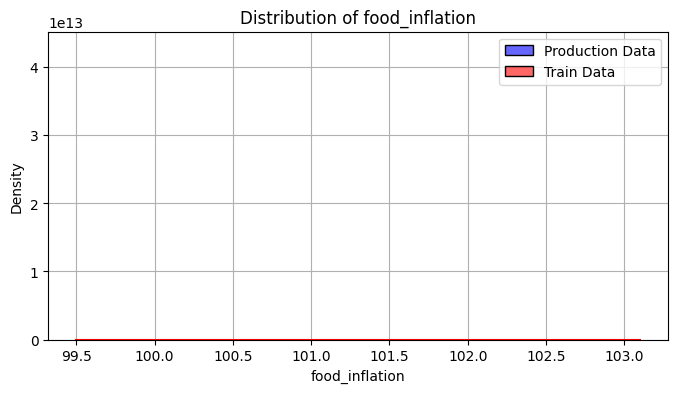


Descriptive statistics for food_inflation in cleaned production data:
  count: 2062.00
  mean: 100.90
  std: 0.00
  min: 100.90
  25%: 100.90
  50%: 100.90
  75%: 100.90
  max: 100.90

Descriptive statistics for food_inflation in cleaned train data:
  count: 4640.00
  mean: 100.61
  std: 0.59
  min: 99.50
  25%: 100.00
  50%: 100.80
  75%: 101.10
  max: 103.10


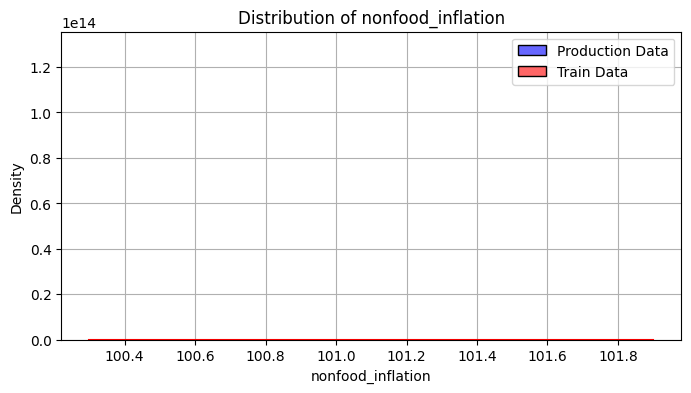


Descriptive statistics for nonfood_inflation in cleaned production data:
  count: 2062.00
  mean: 101.30
  std: 0.00
  min: 101.30
  25%: 101.30
  50%: 101.30
  75%: 101.30
  max: 101.30

Descriptive statistics for nonfood_inflation in cleaned train data:
  count: 4640.00
  mean: 100.57
  std: 0.25
  min: 100.30
  25%: 100.40
  50%: 100.50
  75%: 100.60
  max: 101.90


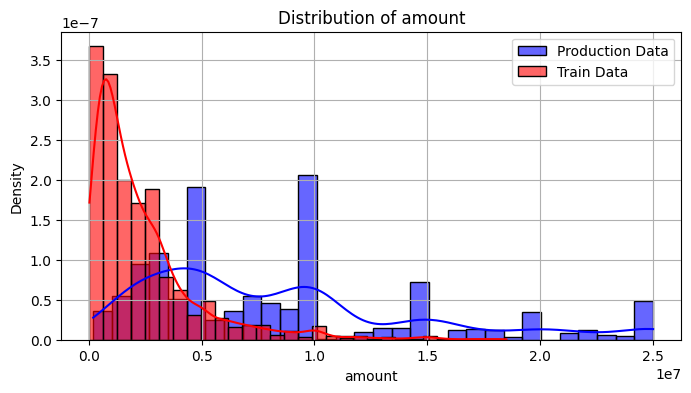


Descriptive statistics for amount in cleaned production data:
  count: 2054.00
  mean: 8435778.58
  std: 6211283.06
  min: 200000.00
  25%: 4000000.00
  50%: 7000000.00
  75%: 10000000.00
  max: 25000000.00

Descriptive statistics for amount in cleaned train data:
  count: 4621.00
  mean: 2351315.76
  std: 2473073.42
  min: 34147.00
  25%: 700000.00
  50%: 1500000.00
  75%: 3000000.00
  max: 18500000.00


In [148]:
def remove_outliers(df, var):
    Q1 = df[var].quantile(0.05)
    Q3 = df[var].quantile(0.95)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[var] >= lower_bound) & (df[var] <= upper_bound)]
    return df_cleaned

prod_data.rename(columns={'monthly_income': 'income'}, inplace=True)
train_data.rename(columns={'income': 'income'}, inplace=True)

common_vars = list(set(prod_data.columns).intersection(train_data.columns))
common_numerical_vars = [var for var in common_vars if pd.api.types.is_numeric_dtype(prod_data[var])]

for var in common_numerical_vars:
    prod_data_clean = remove_outliers(prod_data, var)
    train_data_clean = remove_outliers(train_data, var)
    
    plt.figure(figsize=(8, 4)) 
    
    sns.histplot(prod_data_clean[var], kde=True, label='Production Data', color='blue', alpha=0.6, bins=30, stat='density')
    
    sns.histplot(train_data_clean[var], kde=True, label='Train Data', color='red', alpha=0.6, bins=30, stat='density')
    
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    def format_stats(stats):
        return {k: f'{v:.2f}' for k, v in stats.items()}
    
    prod_desc = format_stats(prod_data_clean[var].describe())
    train_desc = format_stats(train_data_clean[var].describe())
    
    print(f'\nDescriptive statistics for {var} in cleaned production data:')
    for key, value in prod_desc.items():
        print(f'  {key}: {value}')
    
    print(f'\nDescriptive statistics for {var} in cleaned train data:')
    for key, value in train_desc.items():
        print(f'  {key}: {value}')

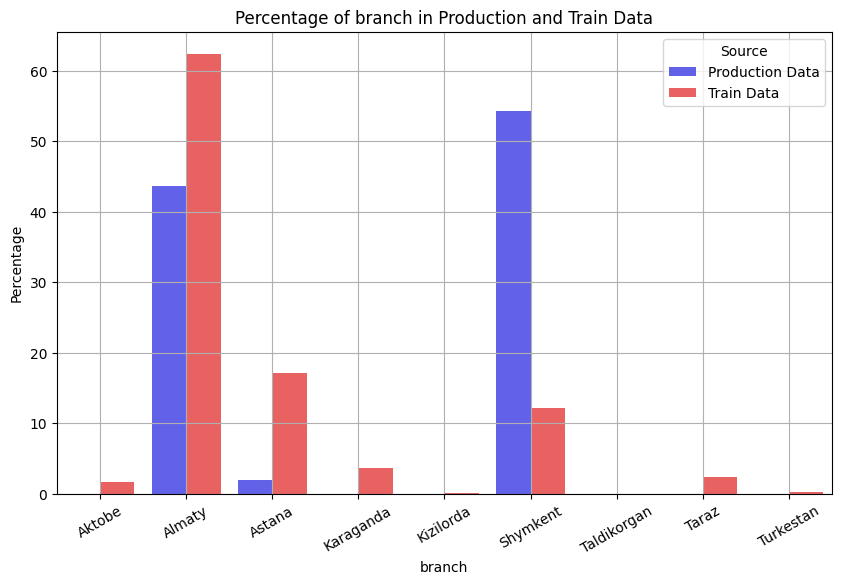


Percentage distribution for branch in production data:
branch
Shymkent    54.32
Almaty      43.65
Astana       2.04
Name: proportion, dtype: float64

Percentage distribution for branch in train data:
branch
Almaty         62.40
Astana         17.21
Shymkent       12.25
Karaganda       3.69
Taraz           2.36
Aktobe          1.70
Turkestan       0.30
Kizilorda       0.06
Taldikorgan     0.02
Name: proportion, dtype: float64


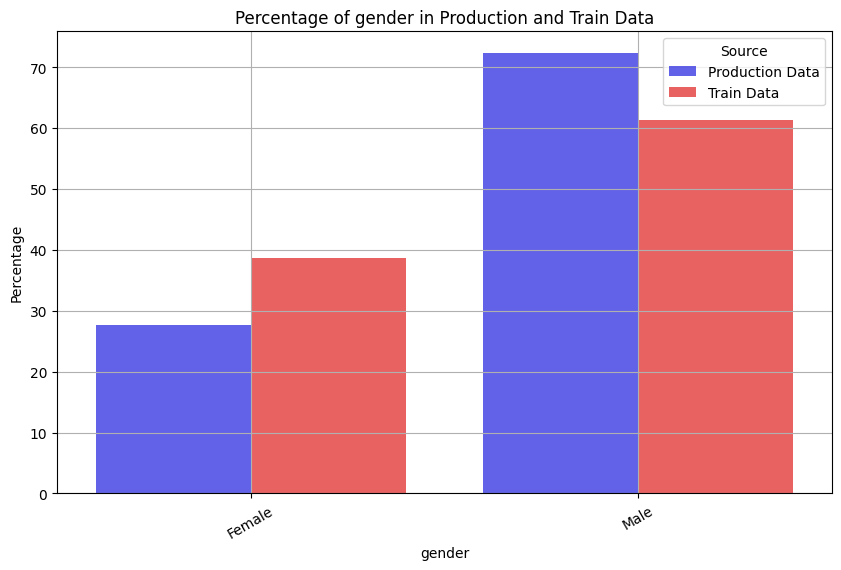


Percentage distribution for gender in production data:
gender
Male      72.26
Female    27.74
Name: proportion, dtype: float64

Percentage distribution for gender in train data:
gender
Male      61.37
Female    38.63
Name: proportion, dtype: float64


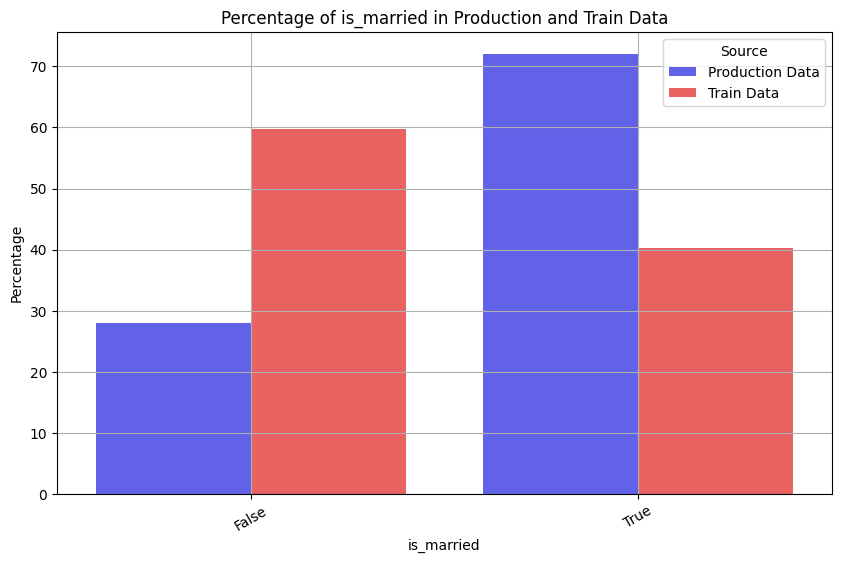


Percentage distribution for is_married in production data:
is_married
True     72.02
False    27.98
Name: proportion, dtype: float64

Percentage distribution for is_married in train data:
is_married
False    59.68
True     40.32
Name: proportion, dtype: float64


In [149]:
branch_replacements = {
    'Shimkent': 'Shymkent',
}

prod_data['branch'] = prod_data['branch'].replace(branch_replacements)
train_data['branch'] = train_data['branch'].replace(branch_replacements)

prod_data['is_married'] = prod_data['is_married'].map({'t': True, 'f': False})
train_data['is_married'] = train_data['is_married'].map({0: False, 1: True})

prod_data['source'] = 'Production Data'
train_data['source'] = 'Train Data'

combined_data = pd.concat([prod_data, train_data], ignore_index=True)

categorical_vars_to_analyze = ['branch', 'gender', 'is_married']

for var in categorical_vars_to_analyze:
    plt.figure(figsize=(10, 6))

    percent_data = combined_data.groupby(['source', var]).size().unstack().fillna(0)
    percent_data = percent_data.div(percent_data.sum(axis=1), axis=0) * 100
    percent_data = percent_data.reset_index().melt(id_vars='source', var_name=var, value_name='percentage')

    sns.barplot(data=percent_data, x=var, y='percentage', hue='source', palette={'Production Data': 'blue', 'Train Data': 'red'}, alpha=0.7)

    plt.title(f'Percentage of {var} in Production and Train Data')
    plt.xlabel(var)
    plt.ylabel('Percentage')
    plt.legend(title='Source')
    plt.grid(True)
    plt.xticks(rotation=30)
    plt.show()

    prod_percentages = prod_data[var].value_counts(normalize=True) * 100
    train_percentages = train_data[var].value_counts(normalize=True) * 100

    print(f'\nPercentage distribution for {var} in production data:')
    print(prod_percentages.round(2))

    print(f'\nPercentage distribution for {var} in train data:')
    print(train_percentages.round(2))

In [165]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

def threshold_breakdown(train_set, test_set, target='is_approved', prediction='prediction'):
    approval_rate_list = []

    for thres in [x / 100 for x in range(10, 26, 5)]:
        thres_metrics = dict()

        # Определяем метки для предсказаний по текущему порогу
        train_set['prediction_label'] = (train_set[prediction] >= thres).astype(int)
        test_set['prediction_label'] = (test_set[prediction] >= thres).astype(int)

        tn_train, fp_train, fn_train, tp_train = confusion_matrix(train_set[target], train_set['prediction_label']).ravel()
        tn_test, fp_test, fn_test, tp_test = confusion_matrix(test_set[target], test_set['prediction_label']).ravel()

        approval_rate = (tp_train + tn_train) / (tp_train + tn_train + fp_train + fn_train) if (tp_train + tn_train + fp_train + fn_train) > 0 else 0
        
        filtered_train_set = train_set[train_set[prediction] >= thres]
        expected_approval_rate = filtered_train_set[target].mean() if not filtered_train_set.empty else 0

        thres_metrics['Threshold'] = int(thres * 100)
        thres_metrics['Approval Rate'] = round(approval_rate, 4)
        thres_metrics['Expected Approval Rate'] = round(expected_approval_rate, 4)

        approval_rate_list.append(thres_metrics)
    
    threshold_df = pd.DataFrame(approval_rate_list)

    threshold_df['Approval Rate'] = threshold_df['Approval Rate'].map('{:.2f}'.format)
    threshold_df['Expected Approval Rate'] = threshold_df['Expected Approval Rate'].map('{:.2f}'.format)

    return threshold_df

train_set = pd.DataFrame({'is_approved': y_train, 'prediction': y_train_pred_proba})
test_set = pd.DataFrame({'is_approved': y_test, 'prediction': y_test_pred_proba})

threshold_df = threshold_breakdown(train_set, test_set, target='is_approved', prediction='prediction')

pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
print(threshold_df)


   Threshold Approval Rate Expected Approval Rate
0         10          0.82                   0.52
1         15          0.92                   0.70
2         20          0.97                   0.85
3         25          0.99                   0.95


In [55]:
def threshold_breakdown(train_set, test_set, target='is_approved', prediction='prediction'):
    approval_rate_list = []

    for thres in [x / 100 for x in range(10, 41, 5)]:
        thres_metrics = dict()

        train_set['prediction_label'] = (train_set[prediction] >= thres).astype(int)
        test_set['prediction_label'] = (test_set[prediction] >= thres).astype(int)

        tn_train, fp_train, fn_train, tp_train = confusion_matrix(train_set[target], train_set['prediction_label']).ravel()
        tn_test, fp_test, fn_test, tp_test = confusion_matrix(test_set[target], test_set['prediction_label']).ravel()

        thres_metrics['Threshold'] = int(thres * 100)
        thres_metrics['Approval Rate'] = round((tp_train + tn_train) / (tp_train + tn_train + fp_train + fn_train), 4) if (tp_train + tn_train + fp_train + fn_train) > 0 else 0

        approval_rate_list.append(thres_metrics)
    
    threshold_df = pd.DataFrame(approval_rate_list)

    threshold_df['Approval Rate'] = threshold_df['Approval Rate'].map('{:.2f}'.format)

    return threshold_df

train_set = pd.DataFrame({'is_approved': y_train, 'prediction': y_train_pred_proba})
test_set = pd.DataFrame({'is_approved': y_test, 'prediction': y_test_pred_proba})

threshold_df = threshold_breakdown(train_set, test_set, target='is_approved', prediction='prediction')

pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)
print(threshold_df)

   Threshold Approval Rate
0         10          0.51
1         15          0.51
2         20          0.51
3         25          0.51
4         30          0.51
5         35          0.51
6         40          0.51


In [ ]:
тут было как в ноушене